Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Part II: Instrumentation
[8.   Analog signals processing](#section_8)  

&nbsp;&nbsp;&nbsp;[8.1. Autocovariance function and stationarity](#section_81)     
&nbsp;&nbsp;&nbsp;[8.2. Fourier series and Fourier transform](#section_82)   
&nbsp;&nbsp;&nbsp;[8.3. Power spectral density and periodograms](#section_83)   
&nbsp;&nbsp;&nbsp;[8.4. White noise and pink noise](#section_84)   
&nbsp;&nbsp;&nbsp;[8.5. Signal derivation and integration](#section_85)   
&nbsp;&nbsp;&nbsp;[8.6. Basic stationarity test](#section_86)   
&nbsp;&nbsp;&nbsp;[8.7. Level upcrossing rate and peak factor](#section_87)   
&nbsp;&nbsp;&nbsp;[8.8. Frequency domain signal filtering](#section_88)   
&nbsp;&nbsp;&nbsp;[8.9. Cross correlation and coherence functions](#section_89)   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [68]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   MRPy import MRPy

## 8. Analog signals processing  <a name="section_8"></a> 

### 8.1. Autocovariance function and stationarity  <a name="section_81"></a> 

Analog signals are the outcome of some physical measurement, usually some electrical 
quantity like voltage, current, or electric charge. The magnitude of such quantities 
are expected to be _analogous_ to some observed physical quantity, like stress, 
force, displacement, acceleration, etc. 

An analog signal is generally considered as a random process, $X(t)$. A random process
is a time dependent random variable, what requires its statistical properties to be also
regarded as time dependent.

The autocovariance function, $C_X(\tau)$, of a random process, $X(t)$, is defined as the
first cross moment between the process amplitude at two time instants:

$$ C_X(t_1, t_2) = {\rm E}\left\{ X(t_1) X(t_2) \right\} - \mu_1\mu_2$$

where $\mu_1$ and $\mu_2$ are the mean value of $X(t)$ at instants $t_1$ and $t_2$,
respectively.
If a random process is _stationary_, its statistical properties are assumed to be
_independent of time_, and the expression above depends only on the time gap, 
$\tau = t_2 - t_1$:

$$ C_X(\tau) = {\rm E}\left\{ X(t) X(t + \tau) \right\} - \mu_X^2 $$

The definitions above exclude the mean value of $X(t)$, keeping only the time
dependent part of its amplitude. Furthermore, it is evident that the autocovariance
function is a _pair function_ (symmetric over the axis $\tau = 0$) and that at origin:

$$ C_X(0) = {\rm E}\left\{ X^2(t) \right\} - \mu_X^2 = \sigma_X^2$$

which is the process _variance_.
The autocovariance function can be normalized by $\sigma_X^2$ resulting in the
process _autocorrelation function_:

$$ R_X(\tau) = \frac{C_X(\tau)}{\sigma_X^2} $$

which is also a pair function such that $-1 \leq R_X(\tau) \leq +1$.


### 8.2. Fourier series and Fourier transform  <a name="section_82"></a> 

An introduction to Fourier analysis can be found in [Class 7](https://nbviewer.jupyter.org/github/mmaiarocha/PEC00025/blob/master/resources/Class_07_FourierTransform.ipynb?flushcache=true) 
of the course [Introduction to Vibration Theory](https://github.com/mmaiarocha/PEC00025).


In [69]:
xi = np.random.randn(1024,1)
X  = MRPy(xi, fs = 128)
X.attributes()

 fs = 128.0Hz
 Td = 8.0s

 NX = 1
 N  = 1024
 M  = 513


### 8.3. Power spectral density and periodograms  <a name="section_83"></a> 

The power spectral density, $S_X(\omega)$, of a stationary random process is defined 
as the Fourier transform of the autocorrelation function, $C_X(\tau)$:

$$ S_X(\omega) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} {C_X(\tau) e^{-i\omega\tau} \, d\tau}$$

This means that $S_X(\omega)$ and $C_X(\tau)$ are a Fourier transform pair, and consequently:

$$ C_X(\tau) = \int_{-\infty}^{+\infty} {S_X(\omega) e^{i\omega\tau} \, d\omega} $$

The definitions above implies that:

$$ C_X(0) = \int_{-\infty}^{+\infty} {S_X(\omega) \, d\omega} = \sigma_X^2$$

what means that the total integral of the spectral density is, by definition,
the process variance.

The ``MRPy`` module provides a straightforward method for visualizing the 
spectral density estimator, called _periodogram_, and the corresponding autocorrelation
function. Below is a short script where a cosine wave is analysed:


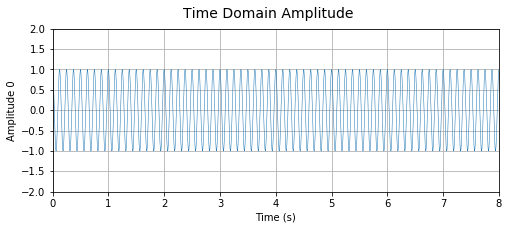

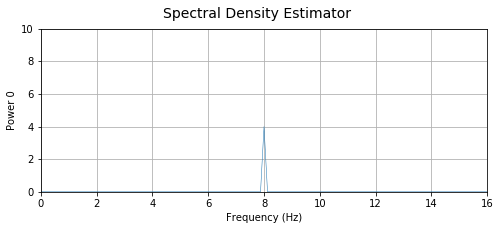

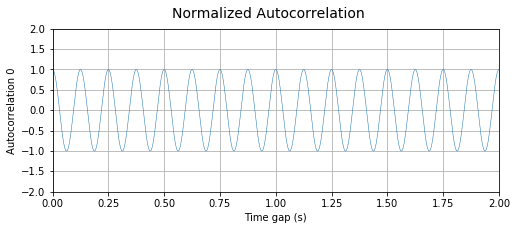

In [70]:
Td   =  8.           # total signal duration
fs   =  1024         # sampling rate
N    =  int(Td*fs)   # total number of samples
f0   =  8.           # cosine wave frequency

t    =  np.linspace(0, Td, N) 
xi   =  np.cos(2*np.pi*f0*t)
X    =  MRPy(xi, fs=fs)

f00  =  X.plot_time(fig=0, figsize=(8,3), axis_t=[0, Td, -2.0,  2.0])
f01  =  X.plot_freq(fig=1, figsize=(8,3), axis_f=[0, 16,  0.0, 10.0])
f02  =  X.plot_corr(fig=2, figsize=(8,3), axis_T=[0,  2, -2.0,  2.0])

It can be seen that the periodogram of a cosine signal is a impulse function 
at the cosine frequency. 


### 8.4. White noise and pink noise <a name="section_84"></a> 

A _Gaussian white noise_ is a signal with random amplitude with normal distribution and 
a constant power density all over the frequency domain:

$$ S_X(\omega) = S_0 $$

The associated autocorrelation function is a Dirac's Delta at the origin, with an
_infinite_ pulse integral.
This signal in practice must have a limited band, otherwise the corresponding variance 
would be infinite. For practical purposes a signal is considered to be a white noise
if the power is constant (within some statistical error) over some relevant
frequency band $\Delta\omega = \omega_2 - \omega_1$:

$$ S_X(\omega) = S_0, \hspace{5mm} {\rm for} 
                      \hspace{5mm} \omega_1 \leq \omega \leq \omega_2 $$ 

and zero otherwise. The corresponding autocorrelation function is:

$$C_X(\tau) = \frac{4S_0}{\tau} \sin\left( \frac{ \Delta\omega}{2} \tau \right) 
                              \cos\left( \omega_0 \tau \right) $$

where $\omega_0 = (\omega_1 + \omega_2)/2$ is the band center.
The corresponding variance is:

$$ \sigma_X^2 = C_X(0) = 2\Delta\omega S_0$$

As the band width $\Delta\omega$ decreases, the signal above approaches a 
cosine wave with frequency $\omega_0$, as described in the previous section.

Let us take a look on a band-limited Gaussian white noise simulation with ``MRPy``.
The simulation uses $S_0 = 1$, hence the standard deviation will be 
$\sigma_X = \sqrt{2\Delta\omega}$.

Mean value:          0.0000
Standard deviation:  2.8284 



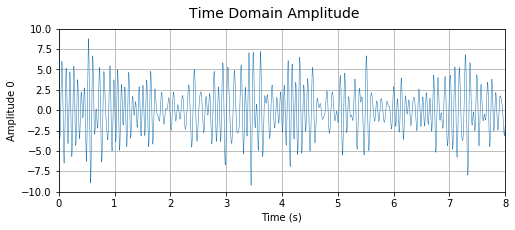

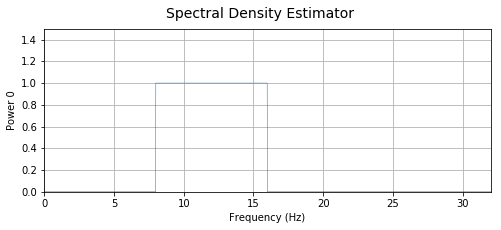

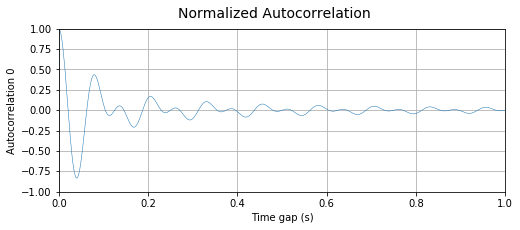

In [71]:
X = MRPy.white_noise(N=2**15, fs=512, band=[8, 16])

print('Mean value:         {0:7.4f}'.format(X[0].mean()))
print('Standard deviation: {0:7.4f}'.format(X[0].std()),'\n')

f03 = X.plot_time(fig=3, figsize=(8,3), axis_t=[0, Td, -10.00, 10.00])
f04 = X.plot_freq(fig=4, figsize=(8,3), axis_f=[0, 32,   0.00,  1.50])
f05 = X.plot_corr(fig=5, figsize=(8,3), axis_T=[0,  1,  -1.00,  1.00])

The ``MRPy`` module uses a simulation technique that gives an almost perfectly
constant periodogram, as specified.


### 8.5. Signal derivation and integration <a name="section_85"></a> 

As a starting point, let us calculate the following derivative:

$$ \frac{d}{d\tau}\left[ X(t) X(t+\tau) \right] = 
                         X(t) \cdot \frac{d X(t + \tau)}{d(t+\tau)} \cdot \frac{d(t+\tau)}{dt} =
                         X(t) \dot{X}(t+\tau) $$

Now, using the expected value operator and considering autocovariance symmetry:

$$ \frac{d C_X(\tau)}{d\tau} = {\rm E}\left\{ X(t) \dot{X}(t+\tau) \right\} 
                             = {\rm E}\left\{ X(t-\tau) \dot{X}(t) \right\} $$

and following the logic to find the second derivative:

$$ \frac{d^2 C_X(\tau)}{d\tau^2} = -{\rm E}\left\{\dot{X}(t) \dot{X}(t+\tau) \right\} 
                                 = - C_{\dot{X}} (\tau)$$

With this result at hand, we go back to the relation between power density and 
autocovariance:

$$ C_X(\tau) = \int_{-\infty}^{+\infty} {S_X(\omega) e^{i\omega\tau} \, d\omega} $$

and apply double derivative:

\begin{align*}
\frac{d C_X(\tau)}{d\tau}     &=  
  \int_{-\infty}^{+\infty} {i\omega  S_X(\omega) e^{i\omega\tau} \, d\omega}   \\
\frac{d^2 C_X(\tau)}{d\tau^2} &= 
- \int_{-\infty}^{+\infty} {\omega^2 S_X(\omega) e^{i\omega\tau} \, d\omega}
\end{align*}

Now, considering that the following relation is also valid:

$$ C_\dot{X}(\tau) = \int_{-\infty}^{+\infty} {S_\dot{X}(\omega) e^{i\omega\tau} \, d\omega} $$

It finally results that:

\begin{align*}
S_\dot{X} (\omega) &= \omega^2 S_{X} (\omega) \\
S_\ddot{X}(\omega) &= \omega^4 S_{X}(\omega)
\end{align*}

These relations allow us to calculate the spectral density of velocity and
acceleration processes from the spectral density of displacement process, or vice-versa.
They are quite useful for converting signal amplitudes obtained with one type of 
transducer (for instance, an accelerometer) to amplitudes as they would have been
obtained with other type of transducer (for instance, displacement).

The ``MRPy`` class provides the calculation of derivatives and integrals in
frequency domain, as demonstrated below. The methods allow the definition
of a passing frequency band, for simultaneously eliminating noise errors.


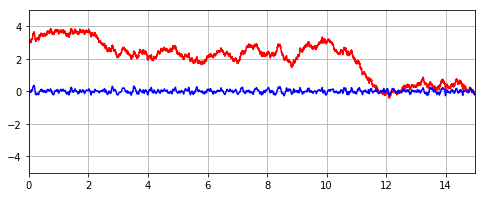

In [72]:
X    =  MRPy.white_noise(N=2**15, fs=512) # full band white noise

A1   =  X.integrate()                     # integration without filtering
A2   =  X.integrate(band=[2, 32])         # integration with filtering

f06  =  plt.figure(6, figsize=(8,3))
f06a =  plt.plot(A1.t_axis(), A1[0], 'r')
f06b =  plt.plot(A2.t_axis(), A2[0], 'b')

plt.axis([0, 15, -5, 5])
plt.grid(True)


Whenever a signal is integrated without a low frequency cut, 
a _zero drift_ is expected to happen! This can be avoided by setting a lower frequency
bound as high as possible without attenuating the useful part of the signal.


### 8.6. Basic stationarity test  <a name="section_86"></a> 

Previously we have demonstrated that:

$$ \frac{d C_X(\tau)}{d\tau} = {\rm E}\left\{ X(t) \dot{X}(t+\tau) \right\} =  
   \int_{-\infty}^{+\infty} {i\omega  S_X(\omega) e^{i\omega\tau} \, d\omega} $$

By making $\tau = 0$ in the relations above gives:

$$ {\rm E}\left\{ X(t) \dot{X}(t) \right\} =  
   \int_{-\infty}^{+\infty} {i\omega  S_X(\omega) \, d\omega} $$

The power spectral density is a _pair function_. Multiplying it by $i\omega$
necessarily yields an _odd function_. Consequently the integral vanishes and:

$$ {\rm E}\left\{ X(t) \dot{X}(t) \right\} = 0 $$

This relation can be a shortcut for ascertaining the signal stationarity and hence
validating the constancy of its spectral density.

This result can be demonstrated through simulation with the ``MRPy`` module.
A Gaussian white noise is simulated and its derivative is calculated. Both
procedures restrain the signals to the same limited band:

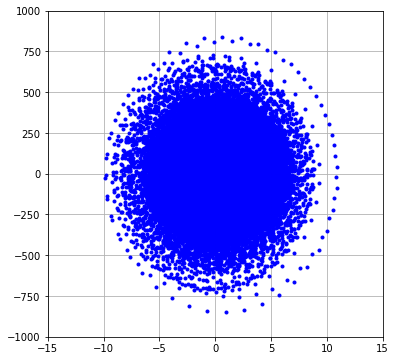

In [73]:
X    =  MRPy.white_noise(N=2**15, fs=512, band=[8, 16])
Xdot =  X.differentiate(band=[8, 16])

f07  =  plt.figure(7, figsize=(6,6))
f07a =  plt.plot(X[0], Xdot[0], 'b.')

plt.axis([-15, 15, -1000, 1000])
plt.grid(True)

The lack of correlation between the process and its derivative observed in the plot 
above is an evidence of process stationarity.

### 8.7. Level upcrossing and peak factors  <a name="section_87"></a> 

For a stationary process, the expected number of upcrossings, $N^{+}_a(T)$, of a given
amplitude level, $a$, within a given observation time, $T$, is given by:

$$ N^{+}_a(T) = \nu^{+}_a T$$

where $\nu^{+}_a$ is the _upcrossing rate_ of level $a$. In other words, the number of
upcrossings is proportional to the observation time.

<img src="resources/level_upcrossing.png" alt="Level upcrossing" width="480px"/>

The upcrossing rate is calculated by integrating the joint probability distribution 
of the process amplitude and its derivative, such that the amplitude is fixed at
level $a$ and only positive values are regarded for its derivative:

$$ \nu^{+}_a = \int_0^{\infty} {p_{X\dot{X}}(x=a, \dot{x}) \, x \, d{\dot{x}}} $$

This result can be particularized for a Gaussian process, also considering that
stationarity implies that the process and its derivative are uncorrelated:

$$ \nu^{+}_a = \frac{1}{2\pi} \, \frac{\sigma_\dot{X}}{\sigma_X} \,
               \exp \left( -\frac{a^2}{2\sigma_X^2} \right) $$

Recalling from previous results that:

$$ \sigma_X^2 = \int_{-\infty}^{+\infty} {S_X(\omega) \, d\omega} $$

and that:

$$ \sigma_\dot{X}^2 = \int_{-\infty}^{+\infty} {\omega^2 S_X(\omega) \, d\omega} $$

allow us to estimate the upcrossing rate for any stationary signal by
integrating the periodogram as indicated above.


Peak factor from Davenport:   3.506
Peak factor from splitmax:    3.281
Peak value for displacement:  0.441


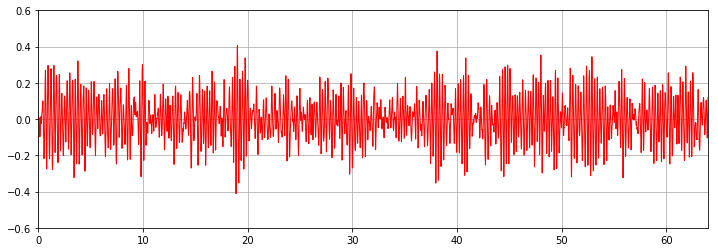

In [74]:
X   =  MRPy.white_noise(N=2**15, fs=512)   # full band white noise
Y   =  10*X.sdof_Duhamel(4, 0.05)          # mass-spring system response

Tm  =  X.Td
gD  =  Y.Davenport(T=Tm)
gS  =  Y.splitmax (T=Tm)

Ypk = Y[0].mean() + gD[0]*Y[0].std()

print('Peak factor from Davenport:  {0:6.3f}'.format(gD[0]))
print('Peak factor from splitmax:   {0:6.3f}'.format(gS[0]))
print('Peak value for displacement: {0:6.3f}'.format(Ypk))

f09  =  plt.figure(9, figsize=(12,4))
f09a =  plt.plot(Y.t_axis(), Y[0], 'r', lw=1)

plt.axis([0, X.Td, -0.6, 0.6])
plt.grid(True)

### 8.8. Frequency domain signal filtering <a name="section_88"></a> 



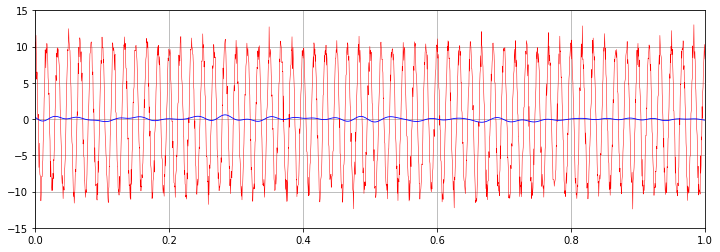

In [75]:
Td   =  4.           # total signal duration
fs   =  2048         # sampling rate
N    =  int(Td*fs)   # total number of samples
f60  =  60.          # sinus wave frequency

t    =  np.linspace(0, Td, N) 
xi   =  np.random.randn(N) + 10*np.cos(2*np.pi*f60*t)
X    =  MRPy(xi, fs=fs)

Y    =  X.filtered(band=[32, fs/2], mode='stop')

f08  =  plt.figure(8, figsize=(12,4))
f08a =  plt.plot(X.t_axis(), X[0], 'r', lw=0.5)
f08b =  plt.plot(Y.t_axis(), Y[0], 'b', lw=0.8)

plt.axis([0, 1, -15, 15])
plt.grid(True)


### 8.9. Cross correlation and coherence functions <a name="section_89"></a> 
